Unzipping the file.zip

In [1]:
!unzip File.zip

Archive:  File.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


Importing Libraries

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

EDA

Before going to any kind of modelling, we will always want to have a look at the kind of data that we have.

We have been provided three files. A description for what each of these files contain is given below:

sample_submission.csv: This gives us a required format for submitting our solutions to the greay atom solution checker.

train.csv: We will use this file for training our model. It contains variables or features that we will input to our model, and the target variable that we want to predict.

test.csv: This will contain all variables in the training dataset except the target variable. We will use our trained model to predict the target for this dataset.




#Data set description

Overview

This is a binary classification problem where you need to predict whether an ad buy will lead to a netgain.
Data Description

train.csv
It contains the training data with advertisement details as described in the last section

test.csv
It has advertisement details for which the participants are to submit whether netgain would be there

sample_submission.csv
It contains the submission format for the predictions against the test set. A single CSV needs to be submitted as a solution.


Evaluation Metric

Submissions are evaluated using F1_Score(Binary) 

In [3]:
ss=pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
ss.head(20)

,netgain
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [5]:
train.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [6]:
test.head()

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


Dataset Shape

In [7]:
print(f'\nTrain contains {train.shape[0]} samples and {train.shape[1]} variables')
print(f'\nTest contains {test.shape[0]} samples and {test.shape[1]} variables')


Train contains 19536 samples and 12 variables

Test contains 6512 samples and 11 variables


Target Distribution

In [8]:
train['netgain'].value_counts(normalize=True)

0    0.761978
1    0.238022
Name: netgain, dtype: float64

Variable Datatypes

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   realtionship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

Null Values

In [10]:
null_values_per_variable = 100 * (train.isnull().sum()/train.shape[0]).round(3)#.reset_index()
null_values_per_variable.sort_values(ascending=False)

netgain                              0.0
money_back_guarantee                 0.0
expensive                            0.0
ratings                              0.0
airlocation                          0.0
airtime                              0.0
average_runtime(minutes_per_week)    0.0
targeted_sex                         0.0
genre                                0.0
industry                             0.0
realtionship_status                  0.0
UserID                               0.0
dtype: float64

In [11]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [12]:
missing_values_table(train)

Your selected dataframe has 12 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [13]:
train.isnull().sum()

UserID                               0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [14]:
train[(train.isna().sum(axis=1)>0)==True]

,UserID,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain


Unique values in each variable

In [15]:
train.nunique()

UserID                               19536
realtionship_status                      7
industry                                 6
genre                                    5
targeted_sex                             2
average_runtime(minutes_per_week)       89
airtime                                  3
airlocation                             42
ratings                                120
expensive                                3
money_back_guarantee                     2
netgain                                  2
dtype: int64

We should check if our dataset has any duplicates rows and drop them

In [16]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape

Total Duplicate Rows except first occurrence based on all columns are :


(0, 12)

In [17]:
df_train=train.copy()

Visually we are able to see communicate things more clearly and graphs help us do that. Lets visualize the same target distribution in a countplot.

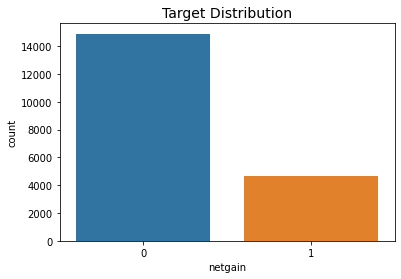

In [18]:
_ = sns.countplot(train['netgain'])
_ = plt.title("Target Distribution", fontsize=14)

Analyzing Each Variable & their relationships
There are two types of features that we have:

    Categorical
    Numerical

Also our target is Binary

For each feature type we will be perform two types of analysis:

    Univariate: Analyze 1 feature at a time

    Bivariate: Analyze the relationship of that feature with target variable, i.e. 'netgain'




Univariate Analysis - Pie Charts.

In [19]:
train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [20]:
cat_cols =train.select_dtypes(include='O').columns.tolist()

In [21]:
cat_cols=['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee']

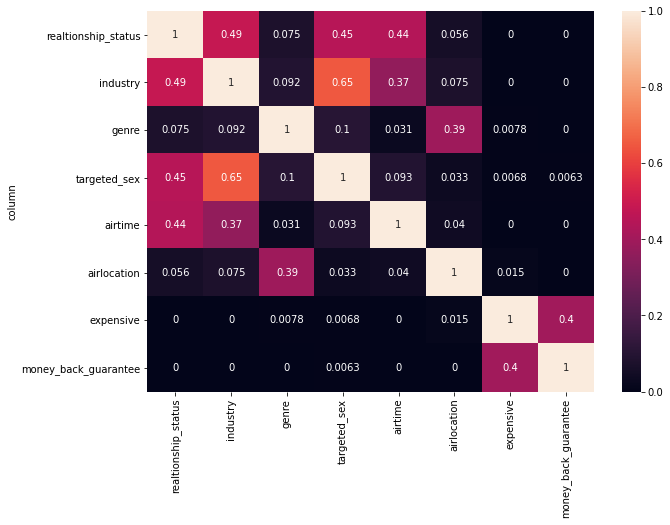

In [22]:
from scipy.stats import chi2_contingency
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))



categorical=['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee']
cramers=pd.DataFrame({i:[cramers_v(train[i],train[j]) for j in categorical] for i in categorical})
cramers['column']=[i for i in categorical if i not in ['memberid']]
cramers.set_index('column',inplace=True)

#categorical correlation heatmap

plt.figure(figsize=(10,7))
sns.heatmap(cramers,annot=True)
plt.show()

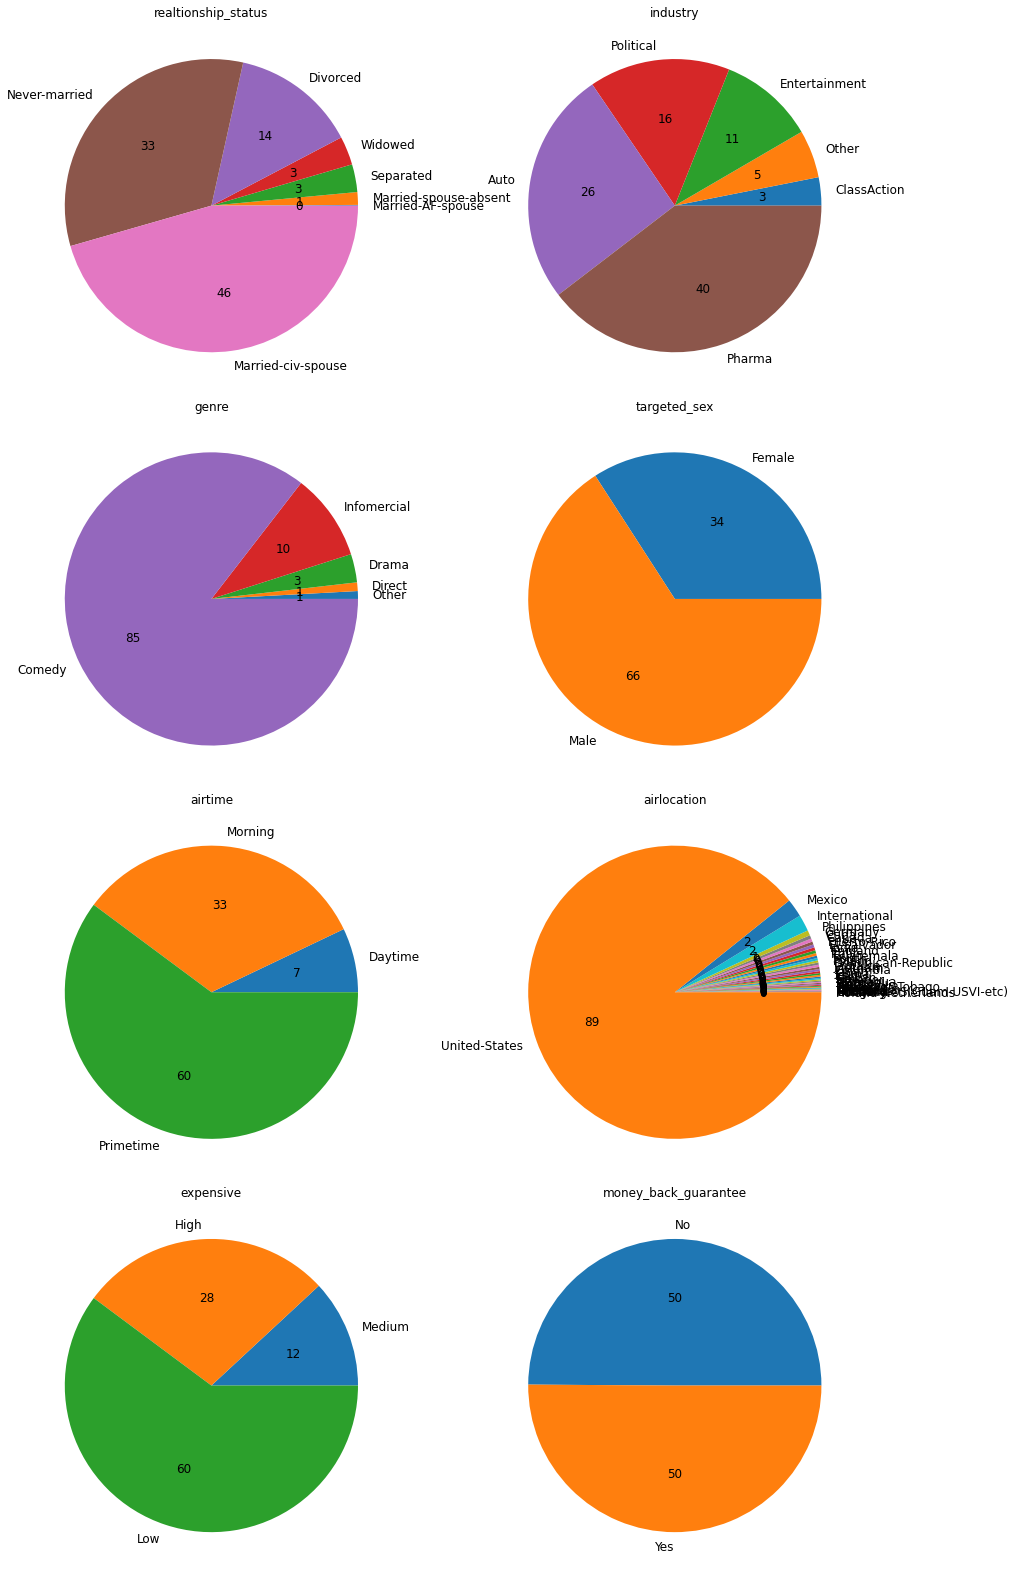

In [23]:
fig, axes = plt.subplots(4, 2, figsize=(14, 22))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'pie', ax=axes[i], title=c, autopct='%.0f', fontsize=12)
    _ = axes[i].set_ylabel('')
    
_ = plt.tight_layout()

Univariate Analysis - CountPlots

Another way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable

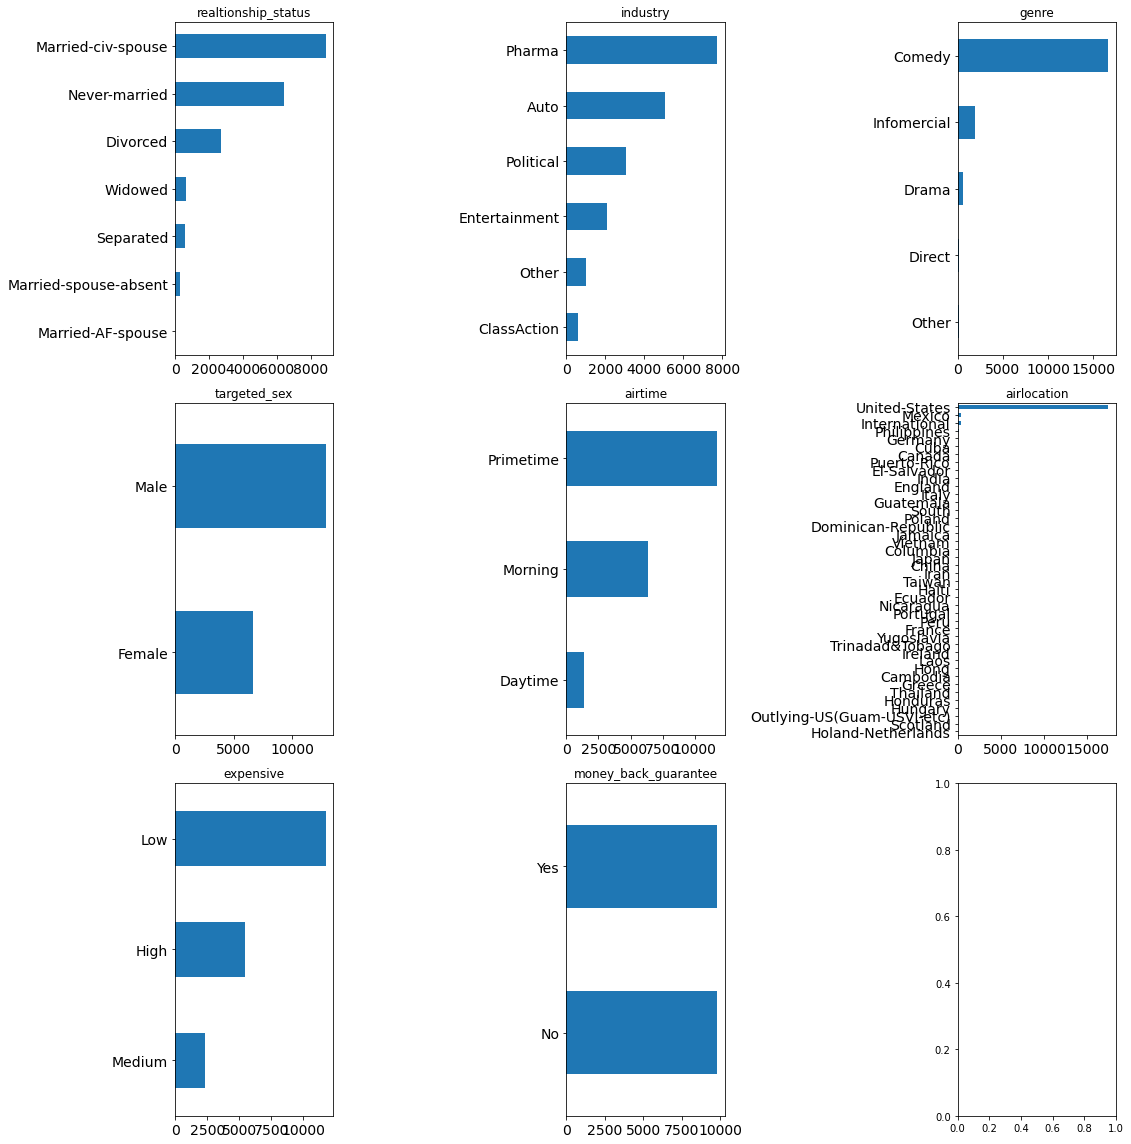

In [24]:
fig, axes = plt.subplots(3, 3, figsize=(16, 16))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    _ = train[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

Bivariate Analysis Relationships with Target

In [25]:
TARGET_COL='netgain'

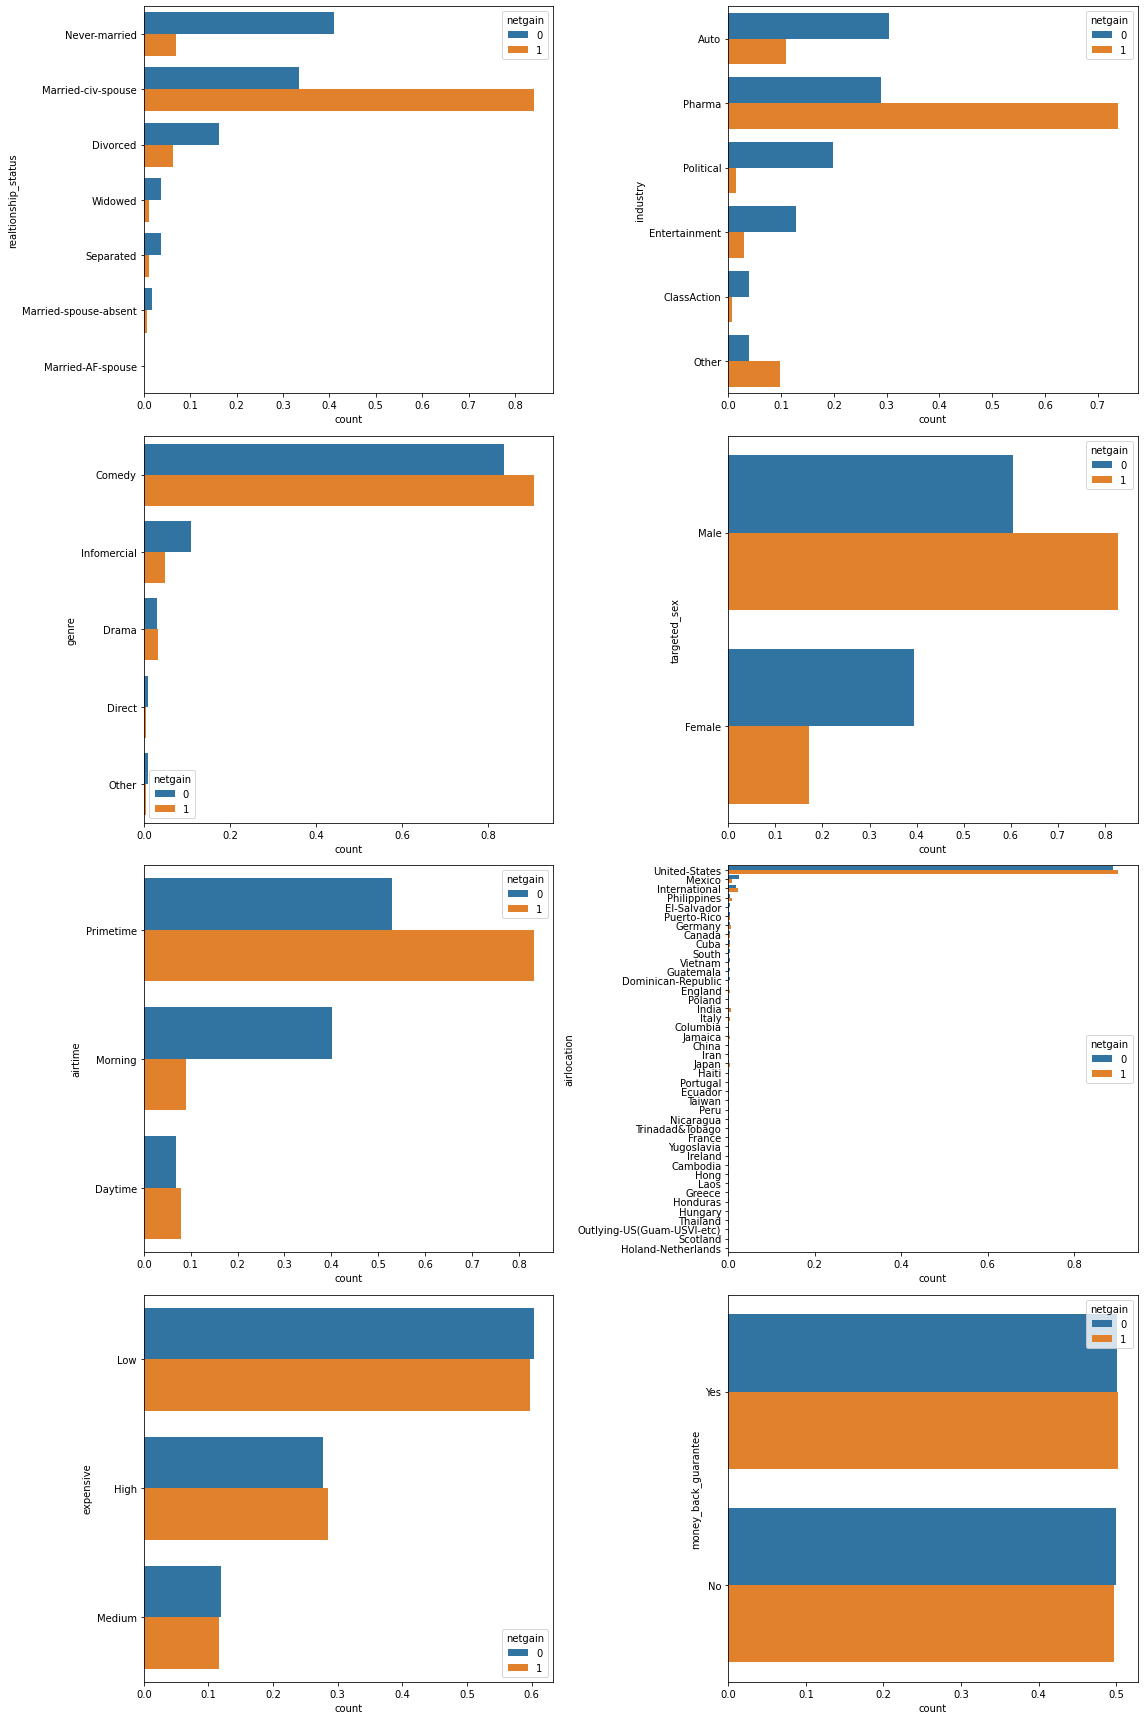

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

Numerical Features

Univariate Analysis - Boxplots

In [27]:
num_cols= train.select_dtypes(exclude='O').columns.tolist()

In [28]:
num_cols

['average_runtime(minutes_per_week)', 'ratings', 'netgain']

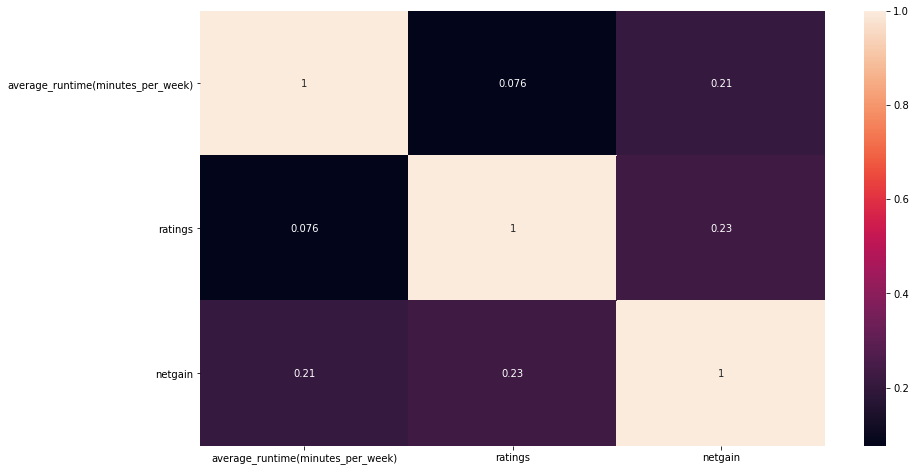

In [29]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

In [30]:
num_cols=['average_runtime(minutes_per_week)', 'ratings']

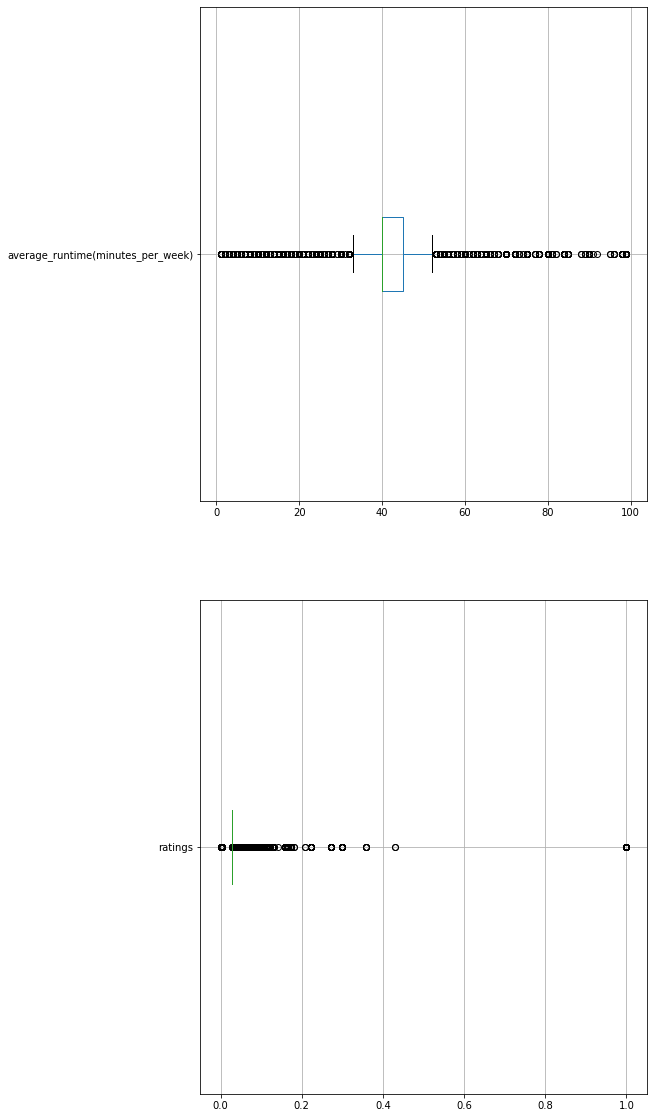

In [31]:
fig, axes = plt.subplots(2, 1, figsize=(8, 20))
for i, c in enumerate(num_cols):
  _ = train[[c]].boxplot(ax=axes[i], vert=False)

 Bivariate Analysis KDE plots - Relationships with Target Variable.

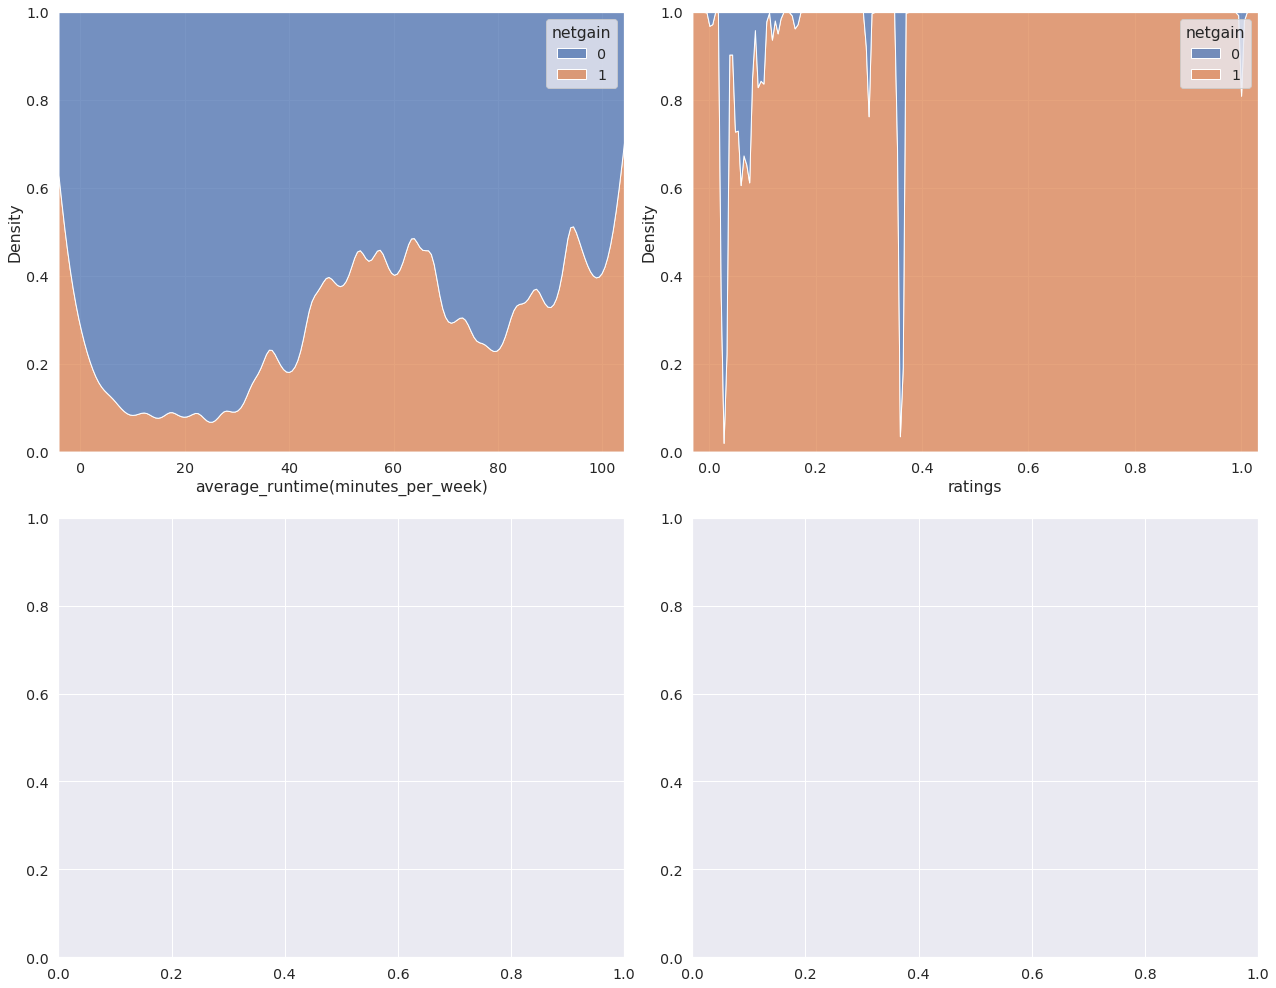

In [60]:
sns.set(font_scale=1.3)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=train, x=c, hue=TARGET_COL, multiple='fill', ax=axes[i])
plt.tight_layout()

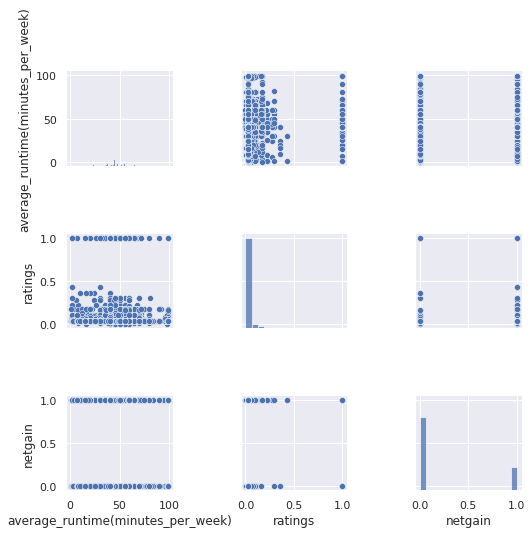

In [63]:
sns.set()
cols = ['industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee','netgain']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

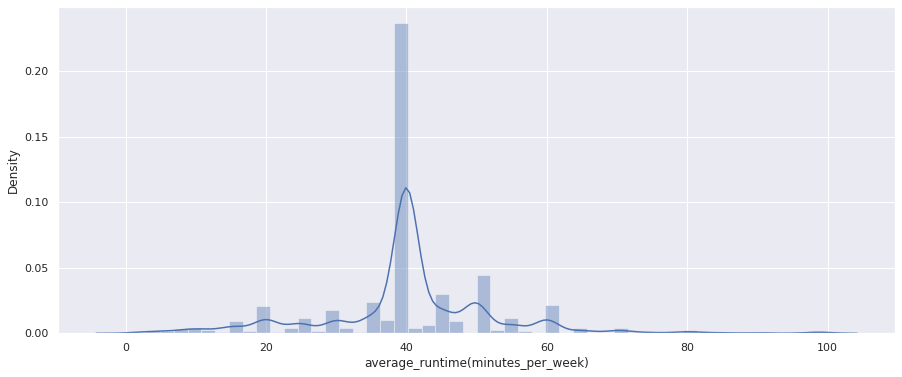

In [64]:
plt.figure(figsize=(15,6))
sns.distplot(df_train['average_runtime(minutes_per_week)'])
plt.show()

#Data Insights 

The sum of netgain for all values of industry and realtionship_status is 4650.

For netgain, Pharma is the most important category of industry with a total value of 3436 (73.9 % of the total).

For netgain, Married-civ-spouse is the most important category of realtionship_status with a total value of 3908 (84 % of the total).

The summed values of netgain over all combinations of the inputs range from a minimum of 0 to a maximum of 3430.

The value of netgain is unusually high when the combination of industry and realtionship_status is Pharma + Married-civ-spouse.

The value of netgain is unusually high when industry is Pharma.

The value of netgain is unusually high when realtionship_status is Married-civ-spouse.


industry is the most important predictor of netgain. industry is more than five times as important as any other field.

The average of ratings for all values of netgain is 0.03883.

The average values of ratings range from a minimum of 0.02902 (when netgain is 0) to a maximum of 0.07022 (when netgain is 1).

0 is the most frequently occurring category of netgain with a count of 14,886 items (76.2 % of the total).

The sum of average_runtime(minutes_per_week) for all values of netgain is 788,779.

The summed values of average_runtime(minutes_per_week) range from a minimum of 209,357 (when netgain is 1) to a maximum of 579,422 (when netgain is 0).

For average_runtime(minutes_per_week), Married-civ-spouse is the most important category of realtionship_status with a total value of 381,780 (48.4 % of the total).

The value of average_runtime(minutes_per_week) is unusually high when realtionship_status is Married-civ-spouse.

The sum of average_runtime(minutes_per_week) for all values of industry and realtionship_status is 788,779.

The summed values of average_runtime(minutes_per_week) over all combinations of the inputs range from a minimum of 10 to a maximum of 338,708.

The value of average_runtime(minutes_per_week) is unusually high when the combination of industry and realtionship_status is Pharma + Married-civ-spouse.

For netgain, Pharma is the most important category of industry with a total value of 3436 (73.9 % of the total).

The value of netgain is unusually high when industry is Pharma.
The sum of netgain for all values of industry and realtionship_status is 4650.

For netgain, Married-civ-spouse is the most important category of realtionship_status with a total value of 3908 (84 % of the total).

The summed values of netgain over all combinations of the inputs range from a minimum of 0 to a maximum of 3430.

The value of netgain is unusually high when the combination of industry and realtionship_status is Pharma + Married-civ-spouse.

The value of netgain is unusually high when realtionship_status is Married-civ-spouse.

For average_runtime(minutes_per_week), Married-civ-spouse is the most important category of realtionship_status with a total value of 381,780 (48.4 % of the total).

The value of average_runtime(minutes_per_week) is unusually high when realtionship_status is Married-civ-spouse.

For average_runtime(minutes_per_week), Male is the most important category of targeted_sex with a total value of 544,792 (69.1 % of the total).

The sum of average_runtime(minutes_per_week) for all values of realtionship_status and targeted_sex is 788,779.

The summed values of average_runtime(minutes_per_week) over all combinations of the inputs range from a minimum of 140 to a maximum of 342,152.

The value of average_runtime(minutes_per_week) is unusually high when the combination of realtionship_status and targeted_sex is Married-civ-spouse + Male.


Using get dummies to convert categorical variable into dummy/indicator variables.

In [33]:
train.nunique()

UserID                               19536
realtionship_status                      7
industry                                 6
genre                                    5
targeted_sex                             2
average_runtime(minutes_per_week)       89
airtime                                  3
airlocation                             42
ratings                                120
expensive                                3
money_back_guarantee                     2
netgain                                  2
dtype: int64

In [34]:
cat_cols

['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee']

In [35]:
data1 = pd.get_dummies(train,columns=['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee'],drop_first=True)

In [36]:
data1

,UserID,average_runtime(minutes_per_week),ratings,netgain,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,UI_9185,40,0.027465,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,UI_449,35,0.027465,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,UI_9014,40,0.027465,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,UI_14987,40,0.027465,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,UI_25532,50,0.027465,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,UI_13124,40,0.027465,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19532,UI_19649,15,0.027465,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
19533,UI_9846,55,0.027465,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
19534,UI_10800,38,0.027465,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [37]:
data1.drop(['UserID'], axis=1, inplace=True)

In [38]:
data2 = pd.get_dummies(test,columns=['realtionship_status',
 'industry',
 'genre',
 'targeted_sex',
 'airtime',
 'airlocation',
 'expensive',
 'money_back_guarantee'],drop_first=True)

In [39]:
data2

,UserID,average_runtime(minutes_per_week),ratings,realtionship_status_Married-AF-spouse,realtionship_status_Married-civ-spouse,realtionship_status_Married-spouse-absent,realtionship_status_Never-married,realtionship_status_Separated,realtionship_status_Widowed,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Male,airtime_Morning,airtime_Primetime,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,expensive_Low,expensive_Medium,money_back_guarantee_Yes
0,UI_8772,40,0.027465,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
1,UI_13139,40,0.027465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,UI_15381,40,0.027465,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,UI_15503,30,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,UI_16556,70,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,UI_2716,40,0.027465,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
6508,UI_17670,40,0.027465,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
6509,UI_16871,40,0.027465,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6510,UI_2667,35,0.027465,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [40]:
X = data1.drop(['netgain'],axis=1)
y = data1['netgain']

In [41]:
X.dtypes

average_runtime(minutes_per_week)              int64
ratings                                      float64
realtionship_status_Married-AF-spouse          uint8
realtionship_status_Married-civ-spouse         uint8
realtionship_status_Married-spouse-absent      uint8
                                              ...   
airlocation_Vietnam                            uint8
airlocation_Yugoslavia                         uint8
expensive_Low                                  uint8
expensive_Medium                               uint8
money_back_guarantee_Yes                       uint8
Length: 64, dtype: object

In [42]:
for x in X.columns:
  X[x]=X[x].astype(int)
  df_types = X.dtypes.value_counts()
print(df_types)

int64    64
dtype: int64


Selecting top 20 features 

In [43]:
from sklearn.ensemble import ExtraTreesClassifier

[2.81862464e-01 2.54479645e-02 8.11243556e-04 1.60503680e-01
 3.80854933e-03 5.48296817e-02 5.36082192e-03 4.77606316e-03
 5.77081502e-03 1.77467522e-02 2.37254119e-02 1.13016270e-01
 1.56106903e-02 3.04112595e-03 6.86899295e-03 1.49089018e-02
 4.61443605e-03 2.52010452e-02 5.46324768e-02 5.09258440e-02
 2.43957914e-03 1.16750569e-03 1.16222923e-03 1.71053807e-03
 1.36727421e-03 1.43066381e-03 1.35763031e-03 1.78256892e-03
 7.75605861e-04 2.17609887e-03 6.72111465e-04 1.56372645e-03
 8.14889129e-04 8.88714062e-08 9.53374580e-05 1.04033882e-03
 2.44773705e-04 2.40229681e-03 4.45665661e-03 1.29185079e-03
 9.58512276e-04 1.49743375e-03 1.69312651e-03 1.41995922e-03
 4.70166871e-04 9.39751369e-03 1.11288950e-03 4.49060376e-04
 5.90130802e-04 3.55988193e-03 1.62195159e-03 7.99376046e-04
 1.77558150e-03 4.55362204e-04 1.40157873e-03 1.29092939e-03
 9.61547277e-04 5.33463526e-04 6.89916908e-03 1.91065798e-03
 1.04329777e-03 2.33037427e-02 1.18693235e-02 2.35703495e-02]


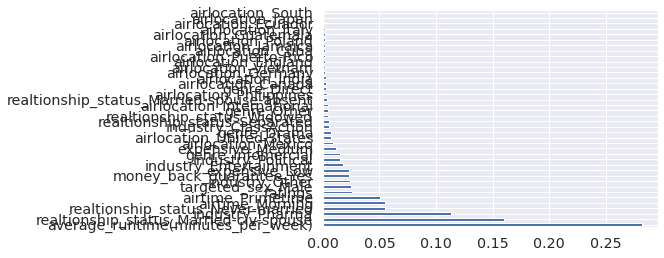

In [44]:
model_features_importance=ExtraTreesClassifier()
model_features_importance.fit(X,y)
print(model_features_importance.feature_importances_)
ranked_features=pd.Series(model_features_importance.feature_importances_,index=X.columns)
ranked_features.nlargest(40).plot(kind='barh')

In [45]:
cols_40=ranked_features.nlargest(40).index.tolist()

In [46]:
cols_40

['average_runtime(minutes_per_week)',
 'realtionship_status_Married-civ-spouse',
 'industry_Pharma',
 'realtionship_status_Never-married',
 'airtime_Morning',
 'airtime_Primetime',
 'ratings',
 'targeted_sex_Male',
 'industry_Other',
 'money_back_guarantee_Yes',
 'expensive_Low',
 'industry_Entertainment',
 'industry_Political',
 'genre_Infomercial',
 'expensive_Medium',
 'airlocation_Mexico',
 'airlocation_United-States',
 'genre_Drama',
 'industry_ClassAction',
 'realtionship_status_Separated',
 'realtionship_status_Widowed',
 'genre_Other',
 'airlocation_International',
 'realtionship_status_Married-spouse-absent',
 'airlocation_Philippines',
 'genre_Direct',
 'airlocation_Canada',
 'airlocation_India',
 'airlocation_Germany',
 'airlocation_Vietnam',
 'airlocation_England',
 'airlocation_Puerto-Rico',
 'airlocation_Cuba',
 'airlocation_Jamaica',
 'airlocation_Poland',
 'airlocation_Guatemala',
 'airlocation_Italy',
 'airlocation_Ecuador',
 'airlocation_Japan',
 'airlocation_South']

In [47]:
X=X[cols_40]

In [71]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score, recall_score,confusion_matrix,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

Splitting the data

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =0)

#Model Training

Logistic Regression

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4449
           1       0.62      0.34      0.44      1412

    accuracy                           0.79      5861
   macro avg       0.72      0.64      0.66      5861
weighted avg       0.77      0.79      0.77      5861

[[4154  295]
 [ 929  483]]
Accuracy of prediction: 0.791
F1 score of model is               0.7678780464500782


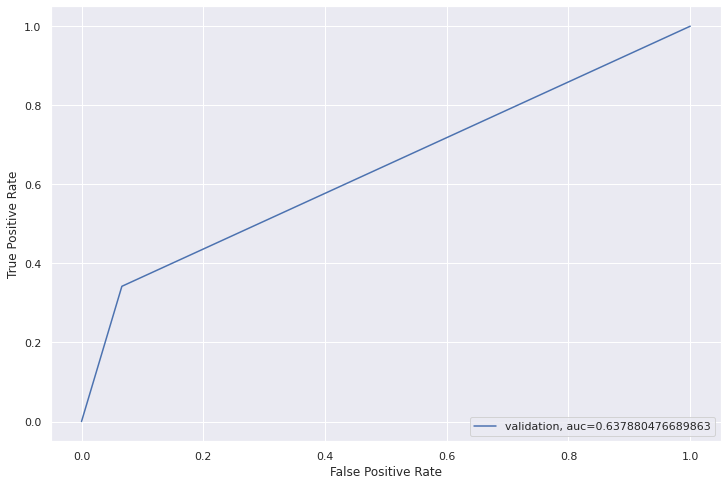

In [72]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)

ypred = model.predict(X_test)

print(classification_report(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,ypred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, ypred)
auc = metrics.roc_auc_score(y_test, ypred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Hyperparameter Tuning of Logistic Regression

In [74]:
# random search logistic regression model on the sonar dataset
from scipy.stats import loguniform
from pandas import read_csv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
# define model
model = LogisticRegression()
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
# execute search
result = search.fit(X, y)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.787298748498273
Best Hyperparameters: {'C': 1.4068447758395648, 'penalty': 'l2', 'solver': 'lbfgs'}


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4449
           1       0.62      0.35      0.45      1412

    accuracy                           0.79      5861
   macro avg       0.72      0.64      0.66      5861
weighted avg       0.77      0.79      0.77      5861

[[4147  302]
 [ 917  495]]
Accuracy of prediction: 0.792
F1 score of model is               0.7697857723792121


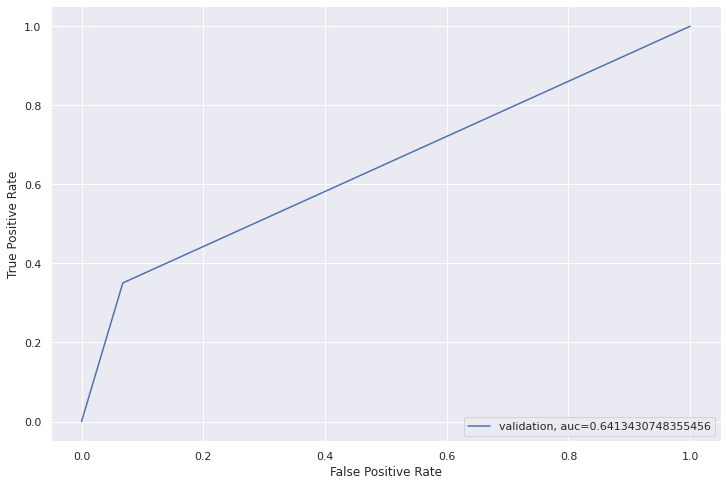

In [75]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2',solver='lbfgs',C=1.4068447758395648)

model.fit(X_train, y_train)

ypred = model.predict(X_test)

print(classification_report(y_test,ypred))
cm=confusion_matrix(y_test,ypred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,ypred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, ypred)
auc = metrics.roc_auc_score(y_test, ypred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300,class_weight={0:0.7, 1:1.2})
rfc.fit(X_train, y_train)



rfc_pred = rfc.predict(X_test)



print(classification_report(y_test,rfc_pred))

cm=confusion_matrix(y_test,rfc_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,rfc_pred,average='weighted'))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4449
           1       0.51      0.69      0.59      1412

    accuracy                           0.76      5861
   macro avg       0.70      0.74      0.71      5861
weighted avg       0.80      0.76      0.78      5861

[[3506  943]
 [ 436  976]]
Accuracy of prediction: 0.765
F1 score of model is               0.7755136539540111


In [65]:
#hyperparameter RandomizedSearchCV
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2,4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [66]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)
rf_randomcv.best_params_
rf_randomcv
best_random_grid=rf_randomcv.best_estimator_
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 30.3min finished


[[4116  333]
 [ 882  530]]
Accuracy Score 0.7926974918955809
Classification report:               precision    recall  f1-score   support

           0       0.82      0.93      0.87      4449
           1       0.61      0.38      0.47      1412

    accuracy                           0.79      5861
   macro avg       0.72      0.65      0.67      5861
weighted avg       0.77      0.79      0.77      5861



In [67]:
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 670,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 14,
 'n_estimators': 400}

Hyperparameter tuning Random Forest

              precision    recall  f1-score   support

           0       0.90      0.80      0.85      4449
           1       0.54      0.72      0.62      1412

    accuracy                           0.78      5861
   macro avg       0.72      0.76      0.73      5861
weighted avg       0.81      0.78      0.79      5861

[[3574  875]
 [ 392 1020]]
Accuracy of prediction: 0.784
F1 score of model is               0.7934079131894386


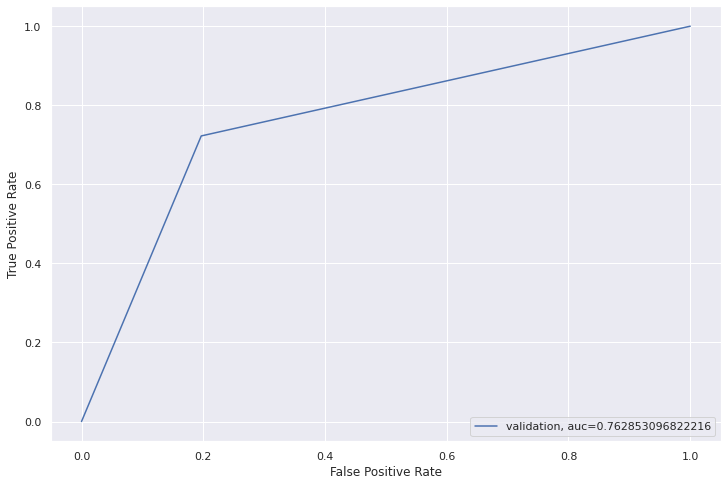

In [79]:
rfc1 = RandomForestClassifier(class_weight={0:0.7, 1:1.2},max_features='sqrt',
                       criterion='gini', max_depth=670,
                       min_samples_leaf=2, min_samples_split=14, n_estimators=400)
rfc1.fit(X_train, y_train)
rfc1_pred = rfc1.predict(X_test)



print(classification_report(y_test,rfc1_pred))

cm=confusion_matrix(y_test,rfc1_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,rfc1_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, rfc1_pred)
auc = metrics.roc_auc_score(y_test, rfc1_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()


XGBC and XGBC tuning

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      4449
           1       0.63      0.34      0.44      1412

    accuracy                           0.79      5861
   macro avg       0.73      0.64      0.66      5861
weighted avg       0.77      0.79      0.77      5861

[[4172  277]
 [ 931  481]]
Accuracy of prediction: 0.794
F1 score of model is               0.7698889691716958


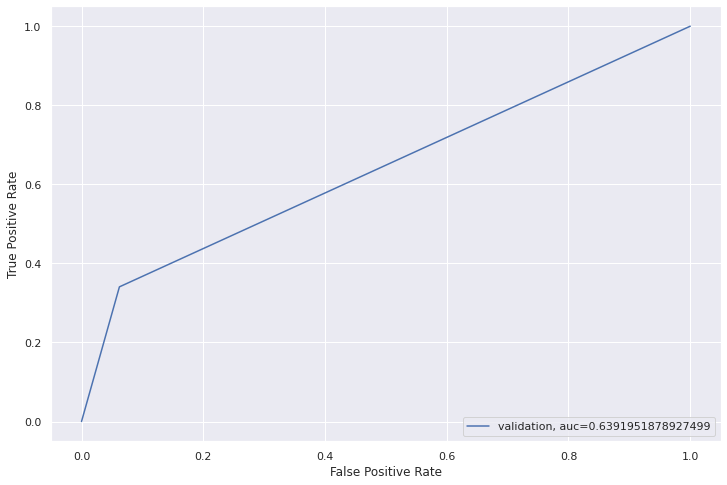

In [81]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV



# Code starts here
xgb_model=XGBClassifier(random_state=0) 
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)

print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,y_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4449
           1       0.63      0.38      0.47      1412

    accuracy                           0.80      5861
   macro avg       0.73      0.65      0.67      5861
weighted avg       0.78      0.80      0.78      5861

[[4134  315]
 [ 881  531]]
Accuracy of prediction: 0.796
F1 score of model is               0.7764658730688403


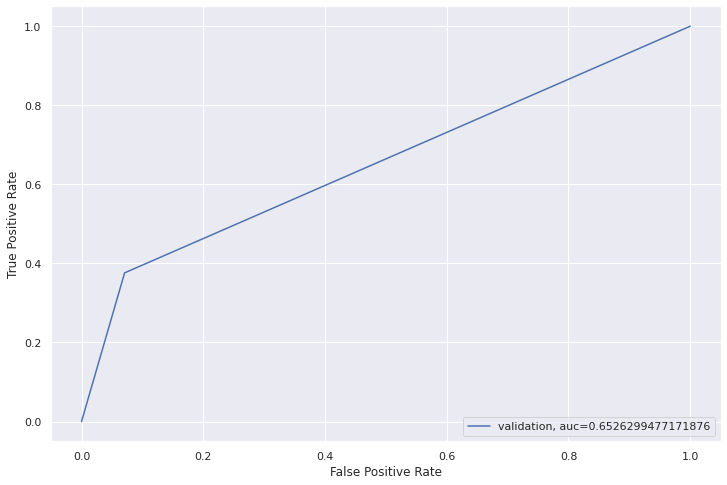

In [82]:
#Parameter list
parameters={'learning_rate':[0.1,0.15,0.2,0.25,0.3],
            'max_depth':range(1,3)}

xgb_clf=XGBClassifier()
clf_model=GridSearchCV(estimator=xgb_clf,param_grid=parameters)
clf_model.fit(X_train,y_train)
y_pred=clf_model.predict(X_test)
print(classification_report(y_test,y_pred))

cm=confusion_matrix(y_test,y_pred)
print(cm)
print ("Accuracy of prediction:",round((cm[0,0]+cm[1,1])/cm.sum(),3))
print('F1 score of model is              ',f1_score(y_test,y_pred,average='weighted'))

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [51]:
data2=data2[cols_40]

In [52]:
data2

,average_runtime(minutes_per_week),realtionship_status_Married-civ-spouse,industry_Pharma,realtionship_status_Never-married,airtime_Morning,airtime_Primetime,ratings,targeted_sex_Male,industry_Other,money_back_guarantee_Yes,expensive_Low,industry_Entertainment,industry_Political,genre_Infomercial,expensive_Medium,airlocation_Mexico,airlocation_United-States,genre_Drama,industry_ClassAction,realtionship_status_Separated,realtionship_status_Widowed,genre_Other,airlocation_International,realtionship_status_Married-spouse-absent,airlocation_Philippines,genre_Direct,airlocation_Canada,airlocation_India,airlocation_Germany,airlocation_Vietnam,airlocation_England,airlocation_Puerto-Rico,airlocation_Cuba,airlocation_Jamaica,airlocation_Poland,airlocation_Guatemala,airlocation_Italy,airlocation_Ecuador,airlocation_Japan,airlocation_South
0,40,0,0,1,0,1,0.027465,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40,0,0,0,0,1,0.027465,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,40,1,1,0,0,1,0.027465,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,30,0,0,1,0,1,0.027465,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,70,0,0,1,1,0,0.027465,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,40,0,0,1,0,1,0.027465,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6508,40,0,0,0,0,1,0.027465,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6509,40,1,1,0,0,1,0.027465,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6510,35,0,0,0,0,1,0.027465,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
ran_test_pred = rfc1.predict(data2)

In [84]:
ran_test_pred 

array([0, 0, 0, ..., 1, 0, 0])

In [85]:
submission=pd.DataFrame({'netgain':ran_test_pred})

In [86]:
submission

,netgain
0,0
1,0
2,0
3,0
4,0
...,...
6507,0
6508,0
6509,1
6510,0


In [87]:
submission.to_csv('Final_Predictions_Advertisement Success Prediction.csv',index=False)